In [1]:
%matplotlib notebook

In [2]:
# Dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# File path and read csv
pathFile = "../Output/Cleaned_Salary_Data.csv"
cleanedSalaryData = pd.read_csv(pathFile)
cleanedSalaryData

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,Atlanta,Job Title,2019-01,Data Scientist,Median Base Pay,"$100,304",0.90%
1,Atlanta,Job Title,2019-01,Data Analyst,Median Base Pay,"$66,636",2.90%
2,Boston,Job Title,2019-01,Data Scientist,Median Base Pay,"$112,119",0.90%
3,Boston,Job Title,2019-01,Data Analyst,Median Base Pay,"$72,037",3.00%
4,Chicago,Job Title,2019-01,Data Scientist,Median Base Pay,"$103,477",0.60%
...,...,...,...,...,...,...,...
195,San Francisco,Job Title,2020-05,Data Analyst,Median Base Pay,"$97,145",4.70%
196,Seattle,Job Title,2020-05,Data Scientist,Median Base Pay,"$138,522",6.20%
197,Seattle,Job Title,2020-05,Data Analyst,Median Base Pay,"$78,551",4.60%
198,Washington DC,Job Title,2020-05,Data Scientist,Median Base Pay,"$114,334",6.50%


In [5]:
# isolate May 2020
currentSalary = cleanedSalaryData[cleanedSalaryData['Month'] == "2020-05"]
currentSalary
# grab columns needed
salaryCity = currentSalary[["Metro", "Dimension", "Value"]]
salaryCity

,Metro,Dimension,Value
180,Atlanta,Data Scientist,"$111,346"
181,Atlanta,Data Analyst,"$69,913"
182,Boston,Data Scientist,"$125,362"
183,Boston,Data Analyst,"$77,030"
184,Chicago,Data Scientist,"$112,504"
185,Chicago,Data Analyst,"$70,995"
186,Houston,Data Scientist,"$120,562"
187,Houston,Data Analyst,"$71,224"
188,Los Angeles,Data Scientist,"$128,747"
189,Los Angeles,Data Analyst,"$78,112"


In [6]:
# check data types
salaryCity.dtypes

Metro        object
Dimension    object
Value        object
dtype: object

In [7]:
# change Value to numeric
salaryCity[salaryCity.columns[2:]] = salaryCity[salaryCity.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
# salaryCity['Value'] = salaryCity['Value'].str.replace("%","")
salaryCity

C:\Users\kathl\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Metro,Dimension,Value
180,Atlanta,Data Scientist,111346.0
181,Atlanta,Data Analyst,69913.0
182,Boston,Data Scientist,125362.0
183,Boston,Data Analyst,77030.0
184,Chicago,Data Scientist,112504.0
185,Chicago,Data Analyst,70995.0
186,Houston,Data Scientist,120562.0
187,Houston,Data Analyst,71224.0
188,Los Angeles,Data Scientist,128747.0
189,Los Angeles,Data Analyst,78112.0


In [9]:
salaryCity = salaryCity.rename(columns={"Metro": "US City", "Dimension": "Job", "Value": "Salary"})
salaryCity

,US City,Job,Salary
180,Atlanta,Data Scientist,111346.0
181,Atlanta,Data Analyst,69913.0
182,Boston,Data Scientist,125362.0
183,Boston,Data Analyst,77030.0
184,Chicago,Data Scientist,112504.0
185,Chicago,Data Analyst,70995.0
186,Houston,Data Scientist,120562.0
187,Houston,Data Analyst,71224.0
188,Los Angeles,Data Scientist,128747.0
189,Los Angeles,Data Analyst,78112.0


<IPython.core.display.Javascript object>


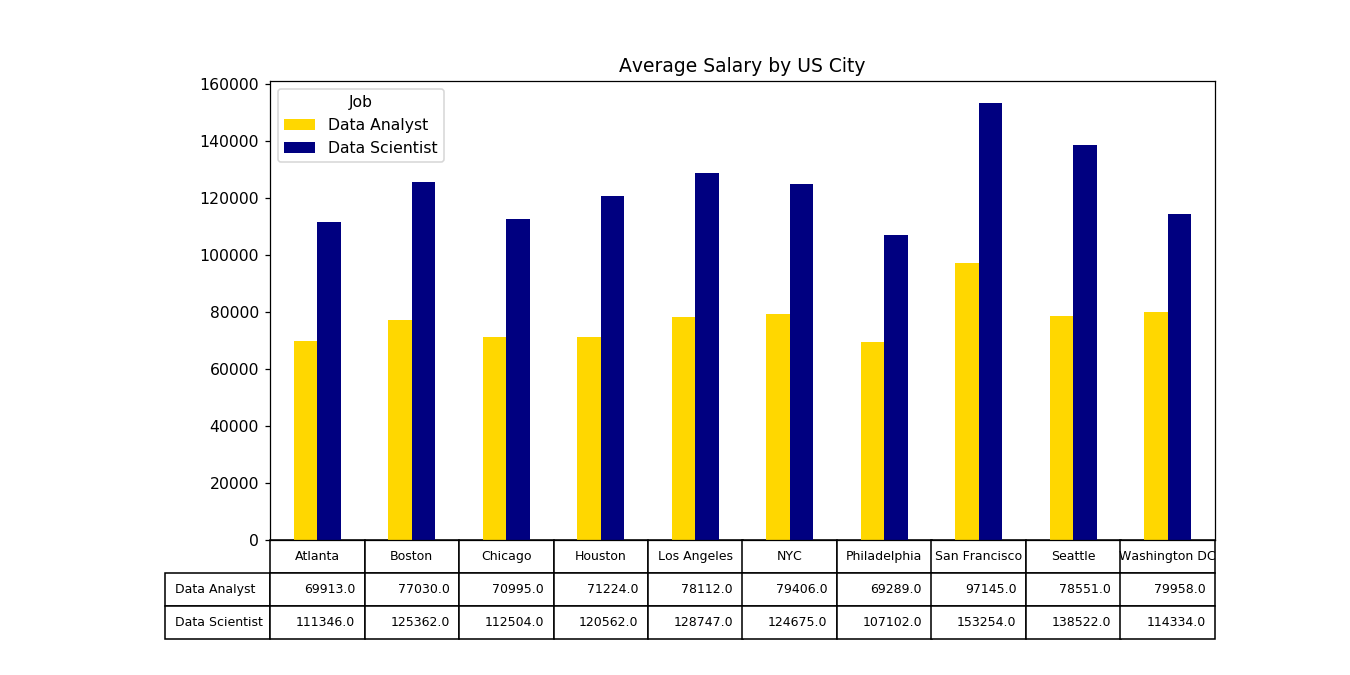

In [10]:
# plot
color = ["gold","navy"]
salaryCityBar = salaryCity.pivot("US City", "Job", "Salary").plot(kind="bar", 
                                                                  fontsize=10, 
                                                                  figsize=(12, 6),
                                                                  title="Average Salary by US City", 
                                                                  table=True,
                                                                 color=color)
# add table
salaryCityBar.axes.get_xaxis().set_visible(False)
table = salaryCityBar.tables[0]
table.scale(1,2)
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.subplots_adjust(left=0.2, bottom=0.2)

# label
plt.y_label = "Salary"
plt.xticks([])

# export png
plt.savefig("../Output/Salary_by_City.png")


In [12]:
# isolate data analysts for ranking results
rankDAsalary  = salaryCity[salaryCity['Job'] == "Data Analyst"]
rankDAsalary

,US City,Job,Salary
181,Atlanta,Data Analyst,69913.0
183,Boston,Data Analyst,77030.0
185,Chicago,Data Analyst,70995.0
187,Houston,Data Analyst,71224.0
189,Los Angeles,Data Analyst,78112.0
191,NYC,Data Analyst,79406.0
193,Philadelphia,Data Analyst,69289.0
195,San Francisco,Data Analyst,97145.0
197,Seattle,Data Analyst,78551.0
199,Washington DC,Data Analyst,79958.0


In [13]:
# condition to rank
rankDAsalaryList = []
daSalaryList=rankDAsalary['Salary']

for x in daSalaryList:  
    if x >= 90000 < 99999: rankDAsalaryList.append(1)
    elif x >= 80000 < 89999 : rankDAsalaryList.append(2)
    elif x >= 70000 < 79999: rankDAsalaryList.append(3)
    else: rankDAsalaryList.append(4)
        
rankDAsalaryList

[4, 3, 3, 3, 3, 3, 4, 1, 3, 3]

In [14]:
# create dataframe
usCity = rankDAsalary["US City"]
rankDAsalary_df = pd.DataFrame({"Cities": usCity, "Rank DA Salary": rankDAsalaryList})
rankDAsalary_df

,Cities,Rank DA Salary
181,Atlanta,4
183,Boston,3
185,Chicago,3
187,Houston,3
189,Los Angeles,3
191,NYC,3
193,Philadelphia,4
195,San Francisco,1
197,Seattle,3
199,Washington DC,3


In [15]:
# export csv to rank
outFile = "../Output/rankDAsalary.csv"
rankDAsalary_df.to_csv(outFile)

In [16]:
# isolate data scientist for ranking
rankDSsalary  = salaryCity[salaryCity['Job'] == "Data Scientist"]
rankDSsalary

,US City,Job,Salary
180,Atlanta,Data Scientist,111346.0
182,Boston,Data Scientist,125362.0
184,Chicago,Data Scientist,112504.0
186,Houston,Data Scientist,120562.0
188,Los Angeles,Data Scientist,128747.0
190,NYC,Data Scientist,124675.0
192,Philadelphia,Data Scientist,107102.0
194,San Francisco,Data Scientist,153254.0
196,Seattle,Data Scientist,138522.0
198,Washington DC,Data Scientist,114334.0


In [17]:
# set conditions for ranking
rankDSsalaryList = []
dsSalaryList=rankDSsalary['Salary']

for x in dsSalaryList:  
    if x >= 150000 < 159999: rankDSsalaryList.append(1)
    elif x >= 140000 < 149999 : rankDSsalaryList.append(2)
    elif x >= 130000 < 139999: rankDSsalaryList.append(3)
    elif x >= 120000 < 129999: rankDSsalaryList.append(4)
    elif x >= 110000 < 119999: rankDSsalaryList.append(5)
    else: rankDSsalaryList.append(6)
            
rankDSsalaryList

[5, 4, 5, 4, 4, 4, 6, 1, 3, 5]

In [19]:
# create dataframe
usCity = rankDSsalary["US City"]
rankDSsalary_df = pd.DataFrame({"Cities": usCity, "Rank DS Salary": rankDSsalaryList})
rankDSsalary_df

,Cities,Rank DS Salary
180,Atlanta,5
182,Boston,4
184,Chicago,5
186,Houston,4
188,Los Angeles,4
190,NYC,4
192,Philadelphia,6
194,San Francisco,1
196,Seattle,3
198,Washington DC,5


In [20]:
outFile = "../Output/rankDSsalary.csv"
rankDSsalary_df.to_csv(outFile)

In [21]:
# isolate May 2020 for YoY analysis
currentSalary = cleanedSalaryData[cleanedSalaryData['Month'] == "2020-05"]
currentSalary

# isolate columns needed
salaryYOY= currentSalary[["Metro", "Dimension", "YoY"]]
salaryYOY

,Metro,Dimension,YoY
180,Atlanta,Data Scientist,6.10%
181,Atlanta,Data Analyst,4.40%
182,Boston,Data Scientist,6.80%
183,Boston,Data Analyst,5.10%
184,Chicago,Data Scientist,7.00%
185,Chicago,Data Analyst,5.30%
186,Houston,Data Scientist,8.70%
187,Houston,Data Analyst,7.00%
188,Los Angeles,Data Scientist,6.20%
189,Los Angeles,Data Analyst,4.50%


In [23]:
# change Value to numeric
salaryYOY[salaryYOY.columns[2:]] = salaryYOY[salaryYOY.columns[2:]].replace('[\%,]', '', regex=True).astype(float)
salaryYOY

,Cities,Job,% Increase Year over Year
180,Atlanta,Data Scientist,6.1
181,Atlanta,Data Analyst,4.4
182,Boston,Data Scientist,6.8
183,Boston,Data Analyst,5.1
184,Chicago,Data Scientist,7.0
185,Chicago,Data Analyst,5.3
186,Houston,Data Scientist,8.7
187,Houston,Data Analyst,7.0
188,Los Angeles,Data Scientist,6.2
189,Los Angeles,Data Analyst,4.5


<IPython.core.display.Javascript object>


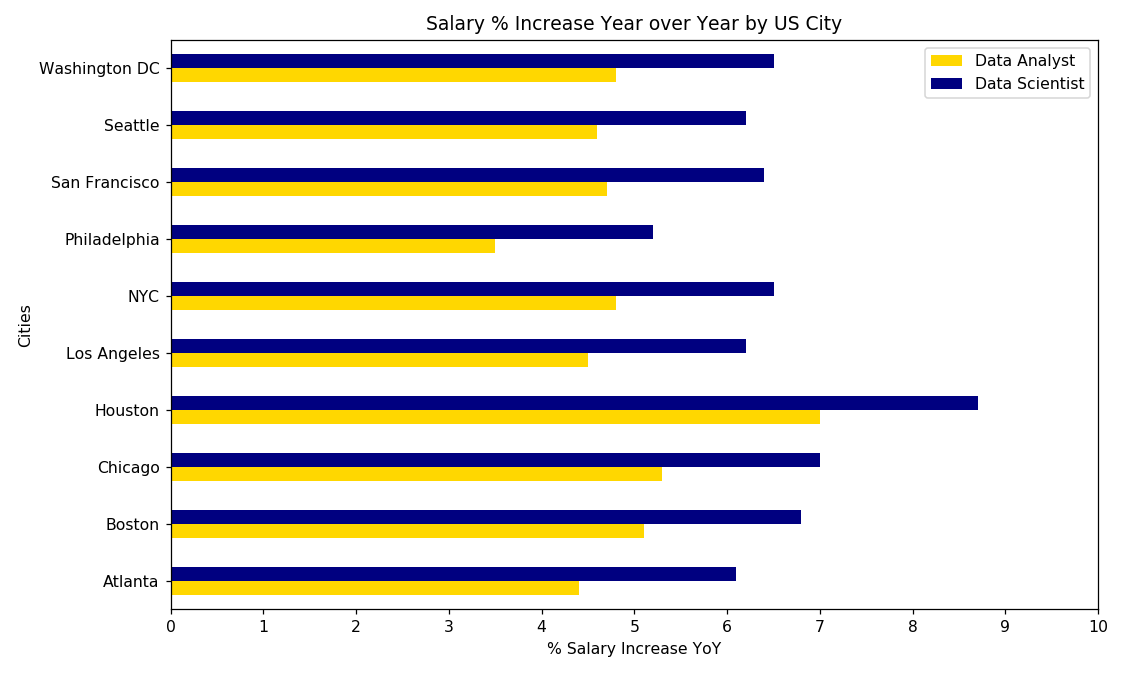

In [24]:
# rename columns
salaryYOY = salaryYOY.rename(columns={"Metro": "Cities", "Dimension": "Job", "YoY": "% Increase Year over Year"})
salaryYOY

# plot
color = ["gold", "navy"]
ax = salaryYOY.pivot("Cities", "Job", "% Increase Year over Year").plot(kind="barh",figsize=(10,6),title="Salary % Increase Year over Year by US City", color=color)
xticks = [0,1,2,3,4,5,6,7,8,9,10]
ax.set(xlabel = "% Salary Increase YoY")
plt.xticks(xticks)
plt.legend(loc="upper right") 
plt.tight_layout()
plt.show()
plt.savefig("../Output/Salary_%_Increase_by_City_YoY.png")

In [25]:
# grab data anaylyst info for ranking
rankDAYOY  = salaryYOY[salaryYOY['Job'] == "Data Analyst"]
rankDAYOY

,Cities,Job,% Increase Year over Year
181,Atlanta,Data Analyst,4.4
183,Boston,Data Analyst,5.1
185,Chicago,Data Analyst,5.3
187,Houston,Data Analyst,7.0
189,Los Angeles,Data Analyst,4.5
191,NYC,Data Analyst,4.8
193,Philadelphia,Data Analyst,3.5
195,San Francisco,Data Analyst,4.7
197,Seattle,Data Analyst,4.6
199,Washington DC,Data Analyst,4.8


In [26]:
# set conditions for ranking
rankDAYOYList = []
daYOYList=rankDAYOY['% Increase Year over Year']

for x in daYOYList:  
    if x >= 7 < 7.99: rankDAYOYList.append(1)
    elif x >= 6 < 6.99 : rankDAYOYList.append(2)
    elif x >= 5 < 5.99: rankDAYOYList.append(3)
    elif x >= 4 < 4.99: rankDAYOYList.append(4)
    else: rankDAYOYList.append(5)
        
rankDAYOYList

[4, 3, 3, 1, 4, 4, 5, 4, 4, 4]

In [27]:
# create dataframe
usCity = rankDAYOY["Cities"]
rankDAYOY_df = pd.DataFrame({"Cities": usCity, "Rank DA Salary YOY": rankDAYOYList})
rankDAYOY_df

,Cities,Rank DA Salary YOY
181,Atlanta,4
183,Boston,3
185,Chicago,3
187,Houston,1
189,Los Angeles,4
191,NYC,4
193,Philadelphia,5
195,San Francisco,4
197,Seattle,4
199,Washington DC,4


In [28]:
outFile = "../Output/rankDAYOY.csv"
rankDAYOY_df.to_csv(outFile)

In [30]:
# isolate data scientist for ranking
rankDSYOY  = salaryYOY[salaryYOY['Job'] == "Data Scientist"]
rankDSYOY

,Cities,Job,% Increase Year over Year
180,Atlanta,Data Scientist,6.1
182,Boston,Data Scientist,6.8
184,Chicago,Data Scientist,7.0
186,Houston,Data Scientist,8.7
188,Los Angeles,Data Scientist,6.2
190,NYC,Data Scientist,6.5
192,Philadelphia,Data Scientist,5.2
194,San Francisco,Data Scientist,6.4
196,Seattle,Data Scientist,6.2
198,Washington DC,Data Scientist,6.5


In [31]:
# set conditions for ranking
rankDSYOYList = []
dsYOYList=rankDSYOY['% Increase Year over Year']

for x in dsYOYList:  
    if x >= 8 < 8.99: rankDSYOYList.append(1)
    elif x >= 7 < 7.99: rankDSYOYList.append(2)
    elif x >= 6 < 6.99 : rankDSYOYList.append(3)
    elif x >= 5 < 5.99: rankDSYOYList.append(4)
    elif x >= 4 < 4.99: rankDSYOYList.append(5)
    else: rankDSYOYList.append(6)
        
rankDSYOYList

[3, 3, 2, 1, 3, 3, 4, 3, 3, 3]

In [33]:
# create dataframe
usCity = rankDSYOY["Cities"]
rankDSYOY_df = pd.DataFrame({"Cities": usCity, "Rank DS Salary YOY": rankDSYOYList})
rankDSYOY_df

,Cities,Rank DS Salary YOY
180,Atlanta,3
182,Boston,3
184,Chicago,2
186,Houston,1
188,Los Angeles,3
190,NYC,3
192,Philadelphia,4
194,San Francisco,3
196,Seattle,3
198,Washington DC,3


In [34]:
# push to a csv
outFile = "../Output/rankDSYOY.csv"
rankDSYOY_df.to_csv(outFile)